In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = datasets.load_boston()
boston = pd.DataFrame(dataset.data)
columns=dataset.feature_names
boston.columns=columns
targets = dataset.target

In [5]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [7]:
boston['Target']=targets

In [8]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


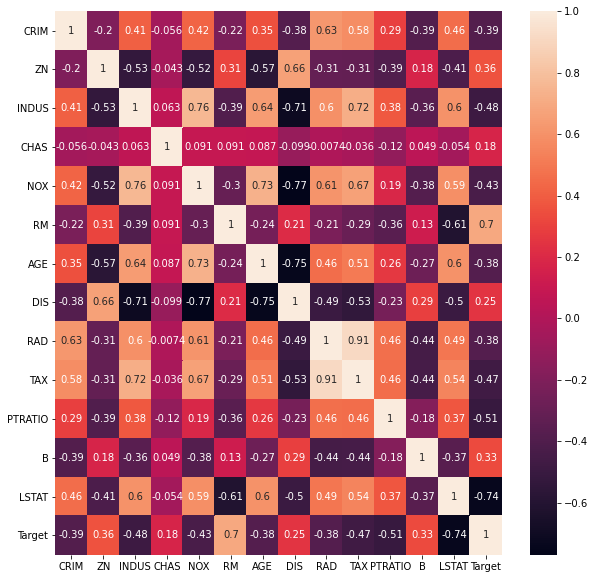

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(boston.corr(),annot=True)
plt.show()

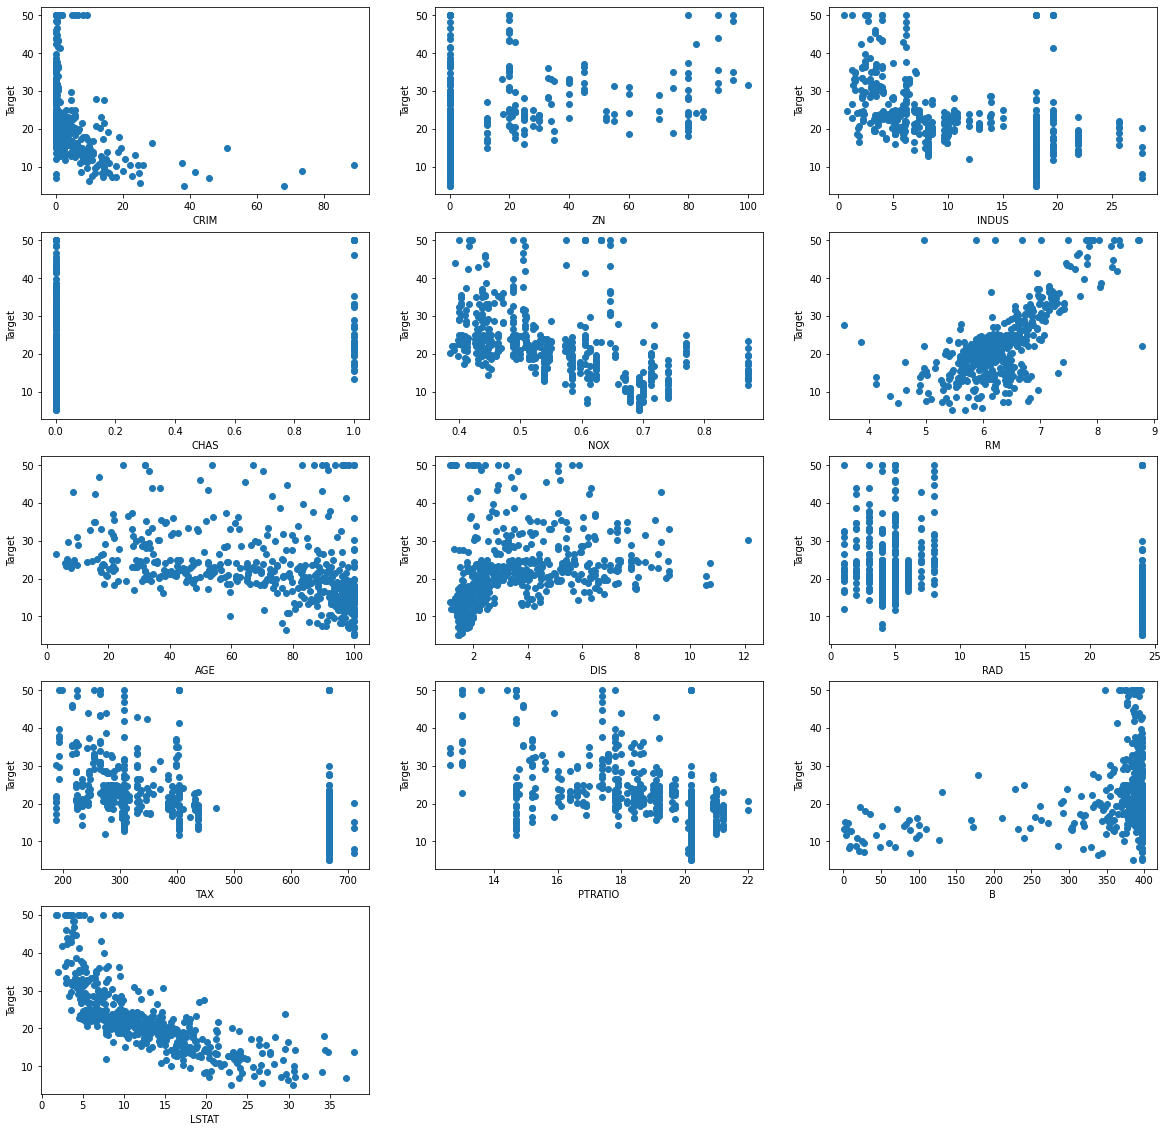

In [10]:
plt.figure(figsize=(20,20))
for i,col in enumerate(columns):
    plt.subplot(5,3,i+1)
    plt.scatter(x=boston[col],y=boston['Target'])
    plt.xlabel(col)
    plt.ylabel('Target')

In [11]:
idx=boston[(boston['RM']>=7)&(boston['Target']<=25)].index
boston.drop(index=idx,inplace=True)
idx

Int64Index([88, 364, 375, 453, 482], dtype='int64')

In [12]:
x=boston.drop('Target',axis=1)
y=boston.Target

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_regression,SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score,KFold

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75)

In [18]:
x_test.iloc[3].values


array([ 13.3598,   0.    ,  18.1   ,   0.    ,   0.693 ,   5.887 ,
        94.7   ,   1.7821,  24.    , 666.    ,  20.2   , 396.9   ,
        16.35  ])

In [ ]:
def adj_r2()

In [77]:
for i in range(4,len(columns)):
    k_best=SelectKBest(f_regression,k=i).fit(x_train,y_train)
    x_best=k_best.transform(x_train)
    reg=RandomForestRegressor(n_estimators=25,max_depth=10)
    reg.fit(x_best,y_train)
    x_test_best=k_best.transform(x_test)
    cv=KFold()
    scores=cross_val_score(estimator=reg,X=x_best,y=y_train,cv=cv,scoring='r2')
    print('for k={} the score is {}'.format(i,np.mean(scores)))
    print('-----')

for k=4 the score is 0.8612701827397944
-----
for k=5 the score is 0.8858978364947652
-----
for k=6 the score is 0.8801205287995526
-----
for k=7 the score is 0.8781945828523625
-----
for k=8 the score is 0.864436095783024
-----
for k=9 the score is 0.8752318550054529
-----
for k=10 the score is 0.8589643987791644
-----
for k=11 the score is 0.861333591709102
-----
for k=12 the score is 0.8605808255803289
-----


In [142]:
def model_training(regressor,x_train,y_train):
    try:
        steps=[('features',SelectKBest(f_regression,k=5)),('model',reg)]
        Forest_pipeline=Pipeline(steps=steps)
        return Forest_pipeline.fit(x_train,y_train)
    except Exception as e:
        print(e)

In [143]:
est=[5,10,15,20,25,30]
dep=[5,6,7,8,9,10]
scores=[]
for i in est:
    for j in dep:
        forest=model_training(RandomForestRegressor(n_estimators=i,max_depth=j),x_train,y_train)
        print('for {} the train score is {}'.format((i,j),adj_r2(forest,x_train,y_train)))
        print('the test score is {}'.format(adj_r2(forest,x_test,y_test)))
        print('-----')
        

for (5, 5) the train score is 0.9813754075635887
the test score is 0.8330122783381215
-----
for (5, 6) the train score is 0.9820112926648196
the test score is 0.8350218029991594
-----
for (5, 7) the train score is 0.9809228384397038
the test score is 0.8330074068825751
-----
for (5, 8) the train score is 0.9796466690497037
the test score is 0.827666801247156
-----
for (5, 9) the train score is 0.9811004209163681
the test score is 0.8276454015210492
-----
for (5, 10) the train score is 0.983534866049021
the test score is 0.8322257767451101
-----
for (10, 5) the train score is 0.9773478240491751
the test score is 0.8244278249673811
-----
for (10, 6) the train score is 0.9786393851260986
the test score is 0.8510734622379561
-----
for (10, 7) the train score is 0.9801839722678087
the test score is 0.8313233362960796
-----
for (10, 8) the train score is 0.9797143044186147
the test score is 0.8161349825429101
-----
for (10, 9) the train score is 0.9822831135231771
the test score is 0.8361696

In [117]:
forest=model_training(RandomForestRegressor(n_estimators=10,max_depth=5),x_train,y_train)

In [121]:
def model_test(model,x_test,y_test):
    prediction=model.predict(x_test)
    score=adj_r2(model,x_test,y_test)
    return prediction,score

In [118]:
def adj_r2(model,x,y):
    r2=model.score(x,y)
    n=x.shape[0]
    p=x.shape[0]
    adj_r=1-((1-r2)*(n-1)/(n-6-1))
    return adj_r

In [119]:
adj_r2(forest,x_test,y_test)

0.8609349824351193

In [120]:
adj_r2(forest,x_train,y_train)

0.9828407364240276

In [125]:
pred,r2=model_test(forest,x_test,y_test)

In [124]:
r2

0.8609349824351193

In [137]:
pred[1]

37.72400000000001

In [136]:
y_test.iloc[1]

39.8

In [138]:
import joblib

In [139]:
file_name='Random_forest.sav'
joblib.dump(forest,file_name)

['Random_forest.sav']

In [140]:
model=joblib.load(file_name)

In [141]:
model.score(x_test,y_test)

0.8631962022329223